In [202]:
# Python
# Packages
import torch
import torchaudio
from torchaudio.pipelines import HDEMUCS_HIGH_MUSDB_PLUS,CONVTASNET_BASE_LIBRI2MIX
from torchaudio.transforms import Fade
from mir_eval import separation
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio, Video
from mir_eval import separation

In [117]:
waveforms = {}
for instrument in ['mixture','bass','drums','other','vocals']:
    waveform, sample_rate = torchaudio.load(f'data/musdb18hq_/train/A Classic Education - NightOwl/{instrument}.wav')
    waveforms[instrument] = waveform
waveforms['sample_rate'] = sample_rate # Same sample rate for all


In [74]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

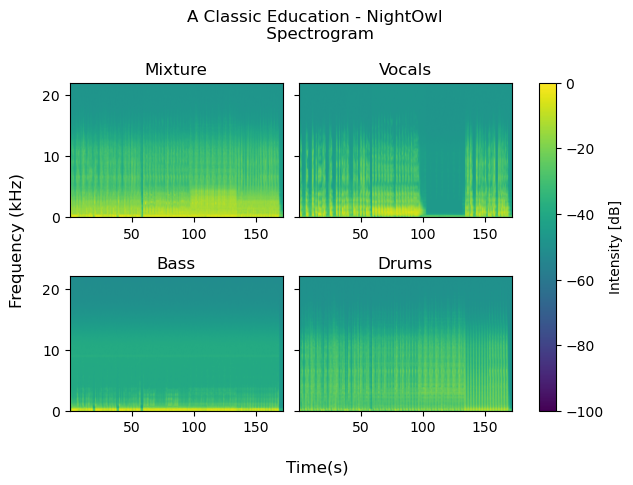

In [173]:
sample_rate = waveforms['sample_rate']

figure, axes = plt.subplots(2, 2, sharey=True)

scale = 1e3 # KHz
ticks = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
axes[0,0].yaxis.set_major_formatter(ticks)
pxx,  freq, t, cax = plt.specgram(waveforms['mixture'][0].numpy(), Fs=sample_rate, clim=(-100, 0))


axes[0,0].specgram(waveforms['mixture'][0].numpy(), Fs=sample_rate, cmap='viridis')
axes[0,1].specgram(waveforms['vocals'][0].numpy(), Fs=sample_rate, cmap='viridis')
axes[1,0].specgram(waveforms['bass'][0].numpy(), Fs=sample_rate, cmap='viridis')
axes[1,1].specgram(waveforms['drums'][0].numpy(), Fs=sample_rate, cmap='viridis')

axes[0,0].set_title('Mixture')
axes[0,1].set_title('Vocals')
axes[1,0].set_title('Bass')
axes[1,1].set_title('Drums')

figure.suptitle('A Classic Education - NightOwl \n Spectrogram')
figure.supylabel('Frequency (kHz)')
figure.supxlabel('Time(s)')

figure.tight_layout()
figure.colorbar(cax, ax=axes, label='Intensity [dB]')

plt.show(block=False)

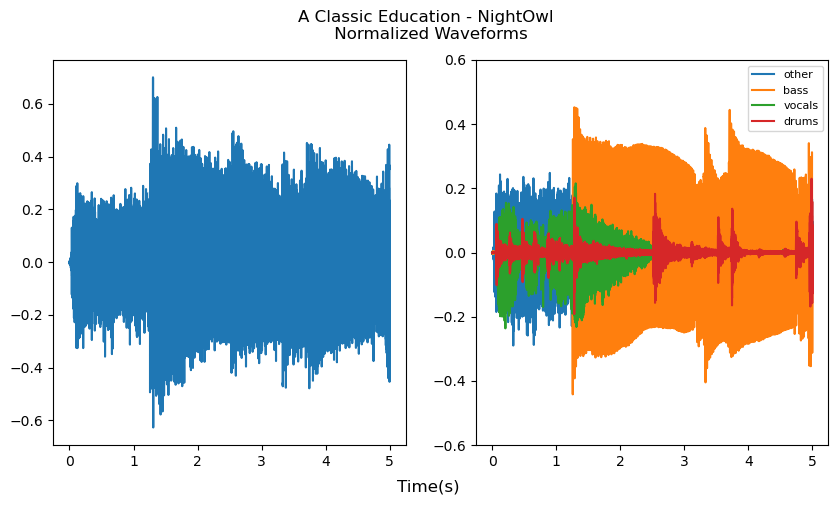

In [233]:
figure, axes = plt.subplots(1,2, figsize=(10,5))
sample_rate = waveforms['sample_rate']
number_of_seconds = sample_rate*5
time_axis = torch.arange(0, number_of_seconds) / sample_rate

axes[0].plot(time_axis, waveforms['mixture'][0].numpy()[0:number_of_seconds])

axes[1].plot(   
    time_axis, waveforms['other'][0].numpy()[0:number_of_seconds],
    time_axis, waveforms['bass'][0].numpy()[0:number_of_seconds],
    time_axis, waveforms['vocals'][0].numpy()[0:number_of_seconds],
    time_axis, waveforms['drums'][0].numpy()[0:number_of_seconds],

)
axes[1].set_ylim(-0.6,0.6)
axes[1].legend(labels=['other','bass','vocals','drums'], fontsize=8)

figure.suptitle('A Classic Education - NightOwl \n Normalized Waveforms')
# figure.supylabel('Frequency (kHz)')
figure.supxlabel('Time(s)')
plt.show()